# ▼ 株価予測

In [3]:
# ライブラリのインポート
from pandas_datareader import data
import pandas_datareader.stooq as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline

In [6]:
# データの読み込み
fin_df = pd.read_csv('/workspace/data/input/finance_dataset.csv')

In [7]:
# データフレームの確認
fin_df.head()

,Date,High,Low,Open,Close
0,1965-01-05,116339.097290,116339.097290,116339.097290,116339.097290
1,1965-01-06,116919.074097,116919.074097,116919.074097,116919.074097
2,1965-01-07,117869.976807,117869.976807,117869.976807,117869.976807
3,1965-01-08,118994.779968,118994.779968,118994.779968,118994.779968
4,1965-01-12,119189.953613,119189.953613,119189.953613,119189.953613


In [8]:
# Dataのデータ型を'datatime'型へ変更
fin_df['Date'] = pd.to_datetime(fin_df['Date'])

In [9]:
# 曜日情報を追加
fin_df['weekday'] =  fin_df['Date'].dt.weekday

In [10]:
# 初めの月曜日となる1965/1/4を基準に週を追加
from datetime import datetime
from datetime import timedelta
start = datetime(1965, 1, 4)
fin_df['weeks'] = (fin_df['Date'] - start) // timedelta(weeks=1)

In [11]:
# カラムの並び替え
fin_df = fin_df[['Date', 'weeks', 'weekday', 'High', 'Low', 'Open', 'Close']]

In [12]:
# 日付をインデックスにセット
fin_df.set_index(keys='Date', inplace=True)

In [13]:
# 昇順に並び替え
fin_df.sort_values(by='Date', ascending=True, inplace=True)

In [14]:
# カラム情報を1行上にずらしたデータフレームを作成する
df_shift = fin_df.shift(-1)

In [15]:
# 翌日の終値と本日の終値の差分を追加する
fin_df['delta_Close'] =  df_shift['Close'] - fin_df['Close']

In [16]:
# 目的目的変数upを追加する（翌日の始値が上がる場合を1、それ以外を0とする）
fin_df['Up'] = 0
fin_df['Up'][fin_df['delta_Close'] > 0] = 1
fin_df = fin_df.drop('delta_Close', axis=1)

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


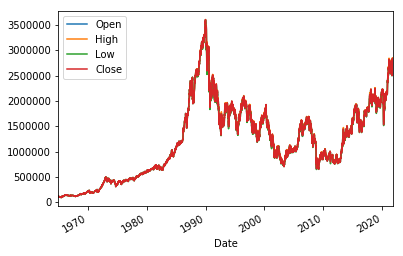

In [17]:
# データの全体像を掴む
df_new = fin_df[['Open', 'High', 'Low', 'Close']]

# 時系列折れ線グラフの作成
df_new.plot(kind='line')

In [18]:
# 特徴量を追加
# 終値の前日比の追加
df_shift = fin_df.shift(1)

fin_df['Close_raito'] = (fin_df["Close"] - df_shift['Close']) / df_shift['Close']

In [19]:
# 始値と終値の差分を追加
fin_df['Body'] = fin_df['Open'] - fin_df['Close']                      

In [20]:
# データの削除
list_weeks = []
list_weeks = fin_df['weeks'].unique()
list_weeks

array([   0,    1,    2, ..., 2961, 2962, 2963])

In [21]:
# 各週毎の日数を入力
fin_df['weeks_days'] = 0

for i in list_weeks:
    fin_df['weeks_days'][fin_df['weeks'] == i] = len(fin_df[fin_df['weeks'] == i])

/root/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [22]:
# 月曜日〜金曜日までの5日分のある週だけデータを取り出す
fin_df = fin_df[fin_df['weeks_days'] == 5]

In [23]:
# 金曜日のデータを削除する
fin_df = fin_df[fin_df['weekday'] != 4]

In [24]:
# 不要カラムの削除と並び替え
fin_df = fin_df[['weekday', 'High', 'Low', 'Open', 'Close', 'Close_raito', 'Body', 'Up']]

# 学習データと検証データに分割

In [25]:
# 学習データと検証データに分割する
df_train = fin_df['2018-01-01' : '2020-12-31']

In [26]:
# 学習データを説明変数と目的変数に分ける
X_train = df_train[['weekday', 'High', 'Low', 'Open', 'Close', 'Close_raito', 'Body']]
y_train = df_train['Up']

# 学習データの説明変数と目的変数を確認
print(X_train)
print(y_train)

            weekday          High           Low          Open         Close  \
Date                                                                          
2018-01-15        0  2.204577e+06  2.190864e+06  2.204088e+06  2.193626e+06   
2018-01-16        1  2.216492e+06  2.192419e+06  2.194208e+06  2.215542e+06   
2018-01-17        2  2.209976e+06  2.195873e+06  2.199966e+06  2.207821e+06   
2018-01-18        3  2.227809e+06  2.192201e+06  2.227301e+06  2.198112e+06   
2018-01-22        0  2.203011e+06  2.192047e+06  2.201300e+06  2.203011e+06   
2018-01-23        1  2.231964e+06  2.212232e+06  2.213007e+06  2.231484e+06   
2018-01-24        2  2.226731e+06  2.212336e+06  2.222445e+06  2.214522e+06   
2018-01-25        3  2.204127e+06  2.187535e+06  2.196935e+06  2.189428e+06   
2018-01-29        0  2.200319e+06  2.181166e+06  2.192911e+06  2.185714e+06   
2018-01-30        1  2.181333e+06  2.149087e+06  2.179238e+06  2.154507e+06   
2018-01-31        2  2.162223e+06  2.136089e+06  2.1

In [27]:
# 検証データを2021-01-01以降としてdf_valに代入
df_val = fin_df['2021-01-01' :]

In [28]:
# 検証データを説明変数と目的変数に分ける
X_val = df_val[['weekday', 'High', 'Low', 'Open', 'Close', 'Close_raito', 'Body']]
y_val = df_val['Up']

# 検証データの説明変数と目的変数を確認
print(X_val)
print(y_val)

            weekday          High           Low          Open         Close  \
Date                                                                          
2021-01-04        0  2.553195e+06  2.501415e+06  2.550740e+06  2.521400e+06   
2021-01-05        1  2.523380e+06  2.504295e+06  2.511503e+06  2.512173e+06   
2021-01-06        2  2.515667e+06  2.497702e+06  2.507014e+06  2.502674e+06   
2021-01-07        3  2.555288e+06  2.528993e+06  2.528993e+06  2.542837e+06   
2021-01-18        0  2.622372e+06  2.600317e+06  2.612078e+06  2.612405e+06   
2021-01-19        1  2.656684e+06  2.624534e+06  2.627508e+06  2.648595e+06   
2021-01-20        2  2.664110e+06  2.627195e+06  2.663883e+06  2.638402e+06   
2021-01-21        3  2.668269e+06  2.652679e+06  2.655713e+06  2.660009e+06   
2021-01-25        0  2.666062e+06  2.642434e+06  2.654647e+06  2.666062e+06   
2021-01-26        1  2.658516e+06  2.638822e+06  2.654408e+06  2.640522e+06   
2021-01-27        2  2.659837e+06  2.640135e+06  2.6

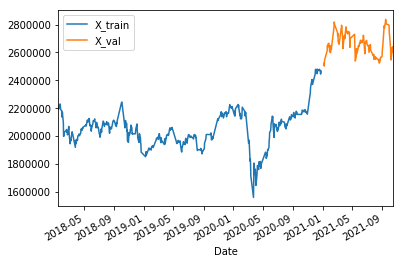

In [29]:
# 学習データ検証データの終値の折れ線ぐらふの作成
X_train['Close'].plot(kind='line')
X_val['Close'].plot(kind='line')

# グラフの凡例を設定
plt.legend(['X_train', 'X_val'])

# グラフの表示
plt.show()

In [30]:
# データを整える
# 標準化関数（StandarScaler）のインポート
from sklearn.preprocessing import StandardScaler

# numpyのインポート
import numpy as np

# 4日毎のデータを抜き出して、標準化とnumpy配列に変換する関数（std_to
def std_to_np(df):
    df_list =  []
    df = np.array(df)
    for i in range(0, len(df) -3, 4):
        df_s =  df[i:i+4]
        scl = StandardScaler()
        df_std =  scl.fit_transform(df_s)
        df_list.append(df_std)
    return np.array(df_list)

In [31]:
# 学習データと検証データの説明変数に関数（std_to_np）を実行
X_train_np_array =  std_to_np(X_train)
X_val_np_array = std_to_np(X_val)

# 学習データと検証データの形の確認
print(X_train_np_array.shape)
print(X_val_np_array.shape) 

(120, 4, 7)
(33, 4, 7)


In [32]:
# 学習データと検証データの目的変数を確認
print(y_train)
print(y_val)

Date
2018-01-15    1
2018-01-16    0
2018-01-17    0
2018-01-18    1
2018-01-22    1
2018-01-23    0
2018-01-24    0
2018-01-25    0
2018-01-29    0
2018-01-30    0
2018-01-31    1
2018-02-01    0
2018-02-05    0
2018-02-06    1
2018-02-07    1
2018-02-08    0
2018-02-19    0
2018-02-20    1
2018-02-21    0
2018-02-22    1
2018-02-26    1
2018-02-27    0
2018-02-28    0
2018-03-01    0
2018-03-05    1
2018-03-06    0
2018-03-07    1
2018-03-08    1
2018-03-12    1
2018-03-13    0
             ..
2020-10-21    0
2020-10-22    1
2020-10-26    0
2020-10-27    0
2020-10-28    0
2020-10-29    0
2020-11-09    1
2020-11-10    1
2020-11-11    1
2020-11-12    0
2020-11-16    1
2020-11-17    0
2020-11-18    0
2020-11-19    0
2020-11-30    1
2020-12-01    1
2020-12-02    1
2020-12-03    0
2020-12-07    0
2020-12-08    1
2020-12-09    0
2020-12-10    0
2020-12-14    0
2020-12-15    1
2020-12-16    1
2020-12-17    0
2020-12-21    0
2020-12-22    1
2020-12-23    1
2020-12-24    0
Name: Up, Length: 4